In [140]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [141]:
file = open("cat.compressed", "w")
original_image = Image.open("cat.bmp")

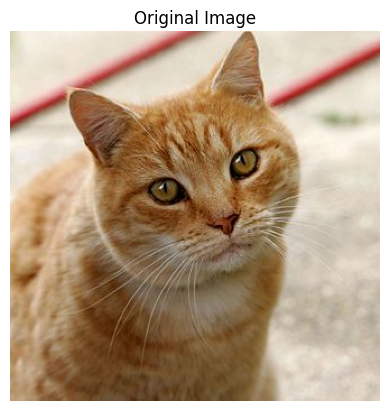

In [142]:
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [143]:
gray_image = original_image.convert('L')

In [144]:
image_array = np.array(gray_image)
height, width = image_array.shape

In [145]:
U, S, V = np.linalg.svd(image_array, full_matrices=False)

In [146]:
k = 50

In [147]:
U_truncated = U[:, :k]
S_truncated = np.diag(S[:k])
V_truncated = V[:k, :]

for row in U_truncated:
    row_str = '\t'.join(map(str,row))
    file.write(row_str+'\n')
for row in S_truncated:
    row_str = '\t'.join(map(str,row))
    file.write(row_str+'\n')
for row in V_truncated:
    row_str = '\t'.join(map(str,row))
    file.write(row_str+'\n')

In [148]:
compressed_image = np.dot(U_truncated, np.dot(S_truncated, V_truncated))

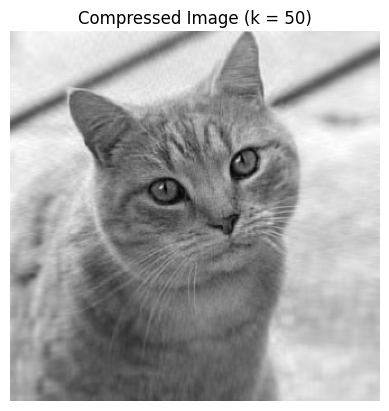

In [149]:
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image (k = {})".format(k))
plt.axis('off')
plt.show()

In [150]:
reconstructed_image = np.dot(U_truncated, np.dot(S_truncated, V_truncated))

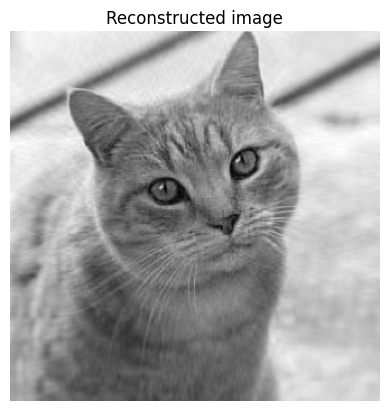

In [151]:
plt.imshow(reconstructed_image, cmap='gray')

#approx_img = Image.fromarray(reconstructed_image.astype('uint8'))
#approx_img.save('approximated_image.bmp')

plt.title("Reconstructed image")
plt.axis('off')
plt.show()